In [93]:
#gathering my data
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics


In [55]:
df= pd.read_csv('C:\\Users\\MOH\Downloads\\bigml_59c28831336c6604c800002a.csv')


#### virsual assissing

In [56]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### programmatic assissing

In [57]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [58]:
df.shape

(3333, 21)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [31]:
df.duplicated().sum()

0

In [80]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [32]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [33]:
df.describe(include='object')


,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [34]:
df['area code'].unique()

array([415, 408, 510], dtype=int64)

array([[<AxesSubplot:title={'center':'account length'}>,
        <AxesSubplot:title={'center':'area code'}>,
        <AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total day minutes'}>],
       [<AxesSubplot:title={'center':'total day calls'}>,
        <AxesSubplot:title={'center':'total day charge'}>,
        <AxesSubplot:title={'center':'total eve minutes'}>,
        <AxesSubplot:title={'center':'total eve calls'}>],
       [<AxesSubplot:title={'center':'total eve charge'}>,
        <AxesSubplot:title={'center':'total night minutes'}>,
        <AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total night charge'}>],
       [<AxesSubplot:title={'center':'total intl minutes'}>,
        <AxesSubplot:title={'center':'total intl calls'}>,
        <AxesSubplot:title={'center':'total intl charge'}>,
        <AxesSubplot:title={'center':'customer service calls'}>]],
      dtype=object)

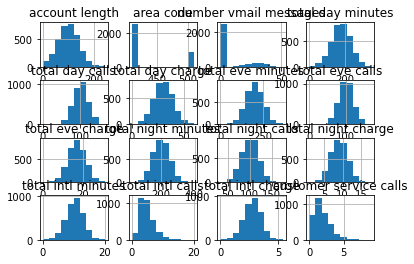

In [38]:
df.hist()

<AxesSubplot:xlabel='number vmail messages'>

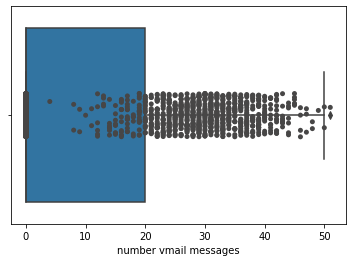

In [42]:
sns.boxplot(x='number vmail messages', data=df)
sns.stripplot(x='number vmail messages', data=df, color="#474646")


#### Quilty
- any object need to be category state	phone number	international plan	voice mail plan columns
#### tidness



### cleaning

#### Define
change datatypes of object columns into category

#### Code

In [52]:
df['state']= df['state'].astype('category')
df['phone number']=df['phone number'].astype('category')
df['international plan']=df['international plan'].astype('category')
df['voice mail plan']=df['voice mail plan'].astype('category')

#### Test

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account length          3333 non-null   int64   
 2   area code               3333 non-null   int64   
 3   phone number            3333 non-null   category
 4   international plan      3333 non-null   category
 5   voice mail plan         3333 non-null   category
 6   number vmail messages   3333 non-null   int64   
 7   total day minutes       3333 non-null   float64 
 8   total day calls         3333 non-null   int64   
 9   total day charge        3333 non-null   float64 
 10  total eve minutes       3333 non-null   float64 
 11  total eve calls         3333 non-null   int64   
 12  total eve charge        3333 non-null   float64 
 13  total night minutes     3333 non-null   float64 
 14  total night calls       

### analysis

#### 3 inshigts
- we knew that precentage of churn(false 68% & true 14%)
- we knew that area code 415  effects on churn greatly
- we knew that customer service calls effects on churn

In [62]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [67]:
df.groupby(["area code", "churn"]).size().unstack()

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


In [84]:
df.groupby(["customer service calls", "churn"]).size().unstack()

churn,False,True
customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


### visualization


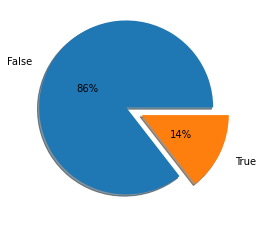

In [61]:
myexplode = [0.2, 0]
plt.pie(df['churn'].value_counts(),labels=df['churn'].value_counts().index, explode = myexplode, shadow = True, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.show()

<AxesSubplot:xlabel='area code'>

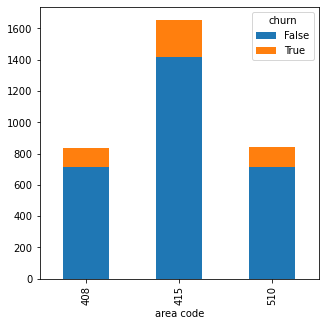

In [65]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<AxesSubplot:xlabel='customer service calls'>

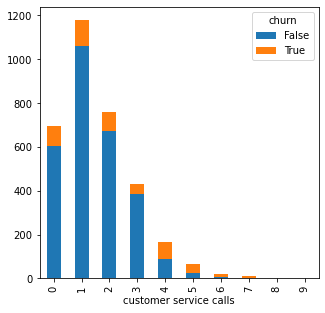

In [83]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### classification

#### turn object to binary

(3333, 2) (3333,)
Counter({0: 1667, 1: 1666})
[-9.6453659  -3.90832214] 1
[-10.71531666  -4.06516221] 1
[-2.8793043   6.85585852] 0
[-1.93078862  6.26940296] 0
[-8.48489256 -4.72934306] 1
[-8.40686816 -4.71902944] 1
[-2.37798086  4.48096696] 0
[-10.16270712  -4.46029519] 1
[-10.31878965  -3.39254252] 1
[-1.23606555  4.48382994] 0


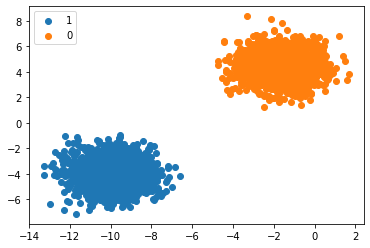

In [90]:

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs

# define dataset
X, y = make_blobs(n_samples=len(df), centers=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize 
for i in range(10):
    print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()